# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

23:23:02 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=545195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=526199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=655660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=294384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

23:23:03 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=605695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=826323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

23:23:05 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=785973;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=18504;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

23:23:06 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=341124;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=394460;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

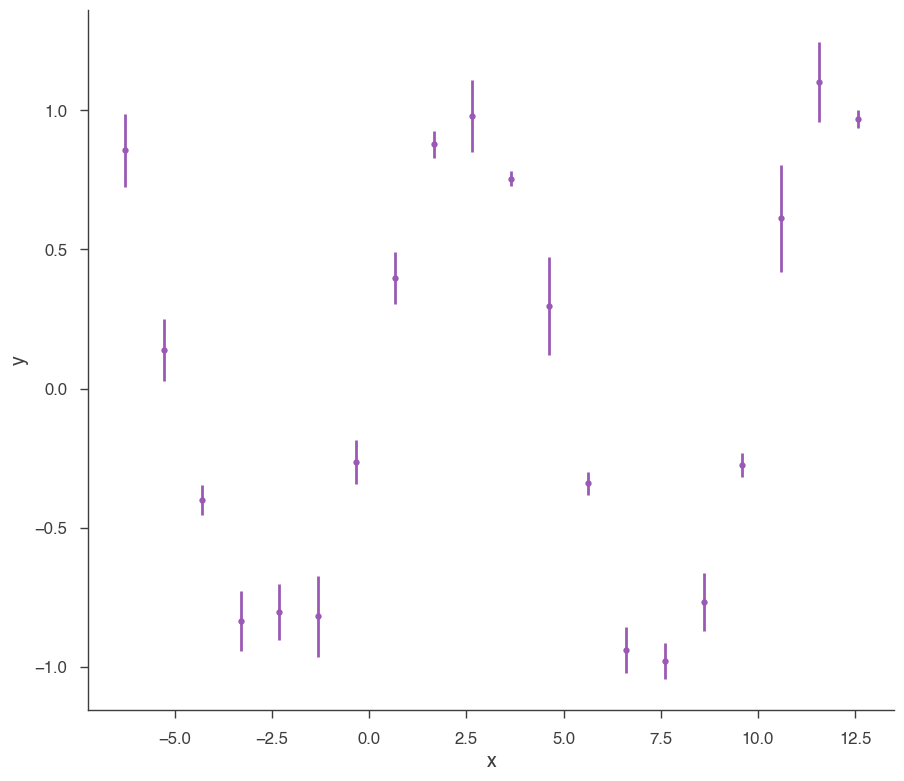

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=568546;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=541747;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:23:10 INFO      Mean acceptance fraction: 0.7108                                            ]8;id=401210;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=995444;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=194380;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=729283;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=93663;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=41683;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.90 -0.19 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 -0.005 +0.006) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.226146
total,-7.226146


Values of statistical measures:

,statistical measures
AIC,19.158174
BIC,20.443756
DIC,18.507919
PDIC,2.027203


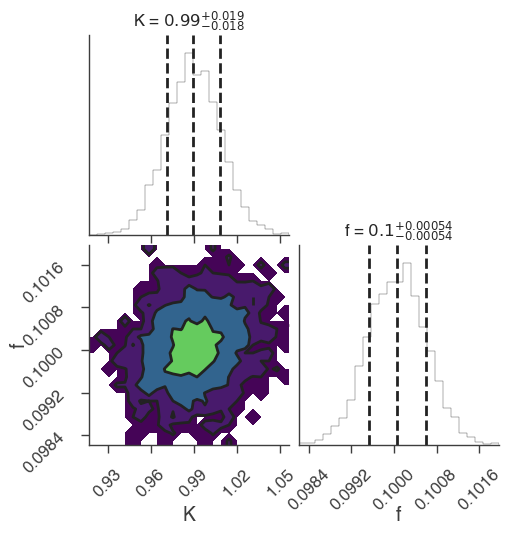

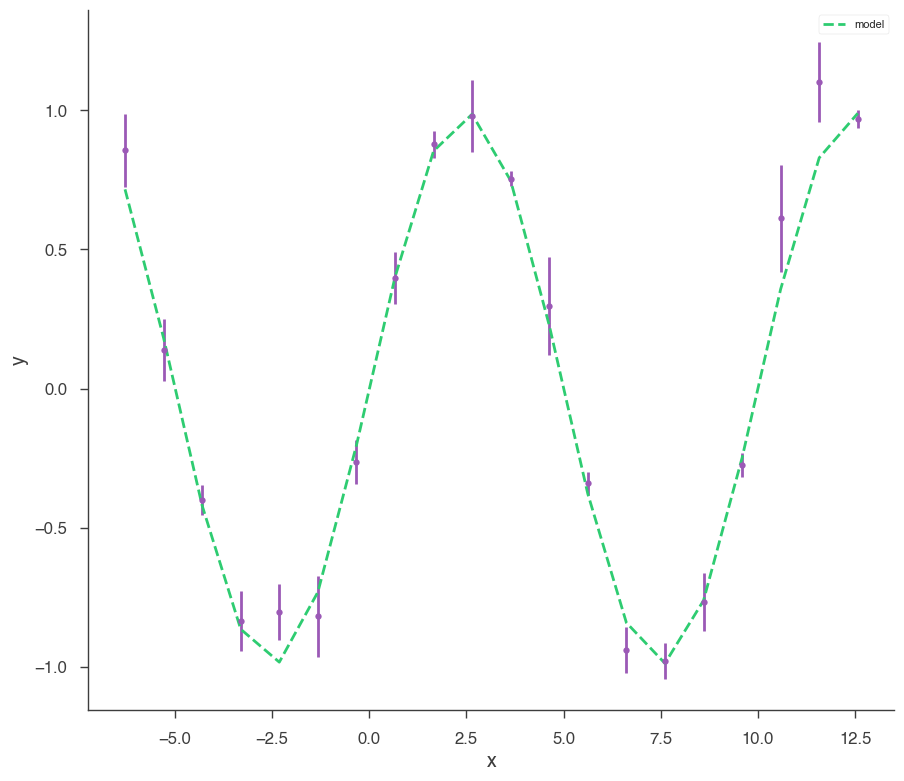

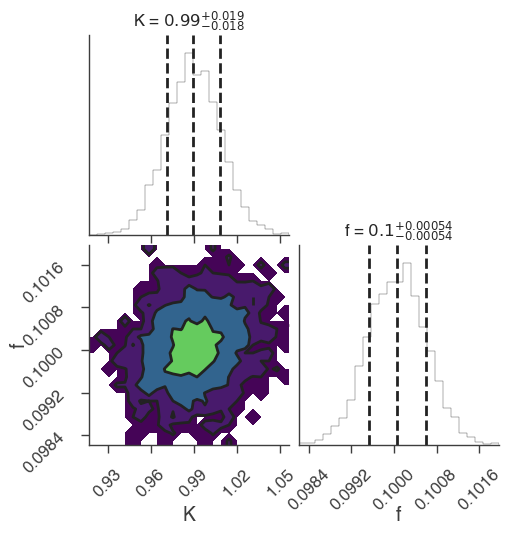

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

23:23:11 INFO      sampler set to multinest                                                ]8;id=589769;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=833537;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -16.211884688691338      +/-  0.14135676411625850     
 Total Likelihood Evaluations:         5367
 Sampling finished. Exiting MultiNest



23:23:12 INFO      fit restored to maximum of posterior                                         ]8;id=339462;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=973435;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=888080;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=708381;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.89 -0.17 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.006) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.228148
total,-7.228148


Values of statistical measures:

,statistical measures
AIC,19.162179
BIC,20.447761
DIC,18.701802
PDIC,2.124429
log(Z),-7.040732


         INFO      deleting the chain directory chains                                     ]8;id=786291;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=965695;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

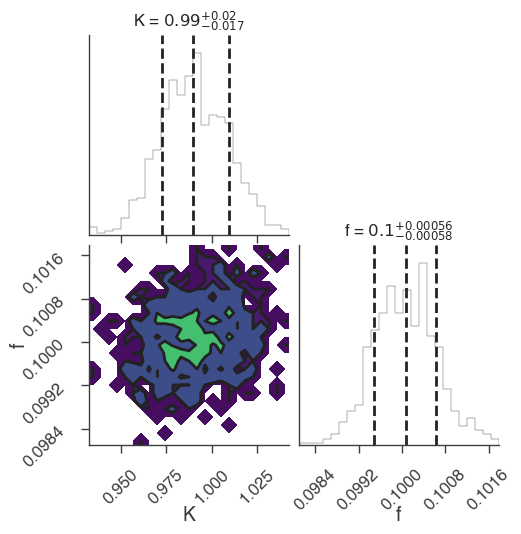

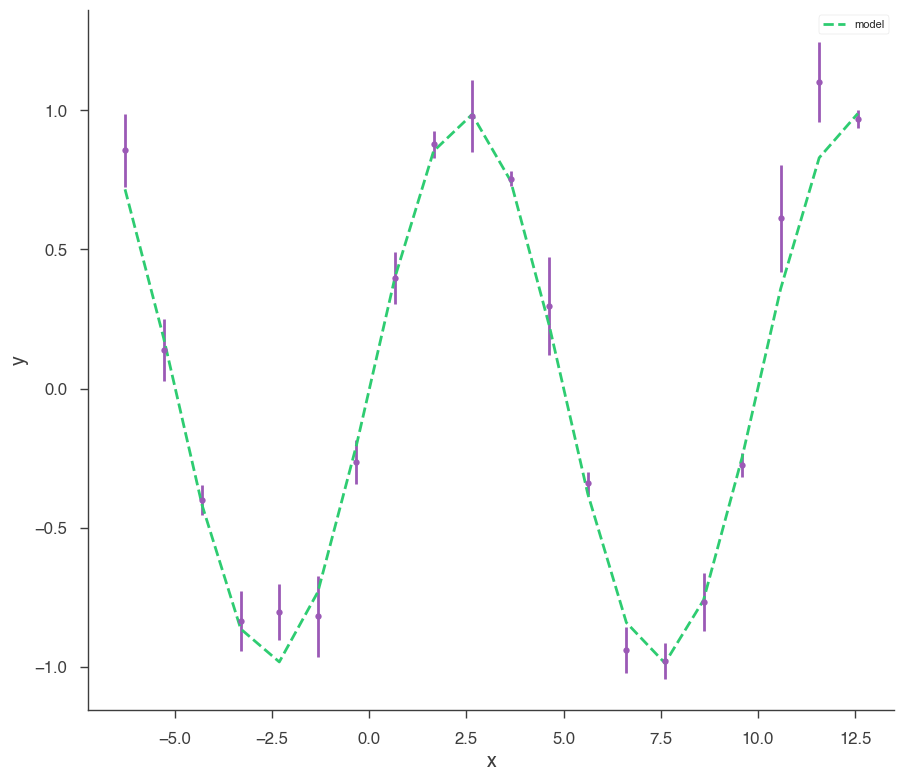

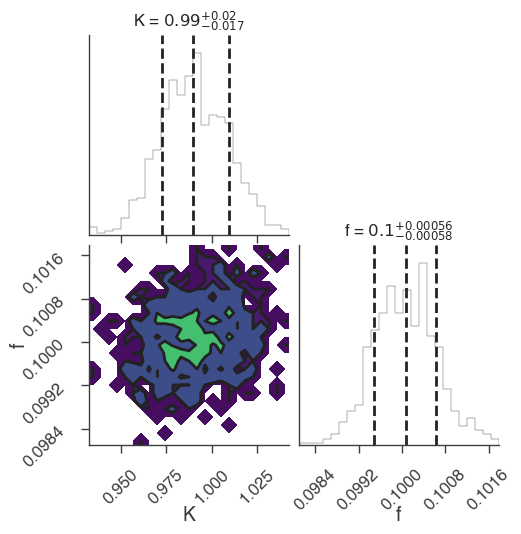

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

23:23:13 INFO      sampler set to dynesty_nested                                           ]8;id=596809;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=322399;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

221it [00:00, 2199.23it/s, bound: 0 | nc: 2 | ncall: 697 | eff(%): 31.707 | loglstar:   -inf < -2685.078 <    inf | logz: -2692.128 +/-  0.128 | dlogz: 2679.036 >  0.409]

441it [00:00, 1921.70it/s, bound: 0 | nc: 1 | ncall: 1199 | eff(%): 36.781 | loglstar:   -inf < -1951.262 <    inf | logz: -1958.615 +/-  0.128 | dlogz: 1944.188 >  0.409]

636it [00:00, 1554.61it/s, bound: 0 | nc: 3 | ncall: 1940 | eff(%): 32.784 | loglstar:   -inf < -1542.477 <    inf | logz: -1550.514 +/-  0.137 | dlogz: 1539.067 >  0.409]

799it [00:00, 1426.24it/s, bound: 0 | nc: 9 | ncall: 2826 | eff(%): 28.273 | loglstar:   -inf < -1312.347 <    inf | logz: -1319.970 +/-  0.131 | dlogz: 1307.117 >  0.409]

946it [00:00, 1262.55it/s, bound: 0 | nc: 19 | ncall: 3893 | eff(%): 24.300 | loglstar:   -inf < -1177.300 <    inf | logz: -1186.013 +/-  0.143 | dlogz: 1177.739 >  0.409]

1076it [00:00, 888.66it/s, bound: 0 | nc: 1 | ncall: 5525 | eff(%): 19.475 | loglstar:   -inf < -988.527 <    inf | logz: -997.773 +/-  0.149 | dlogz: 989.783 >  0.409]    

1179it [00:01, 726.99it/s, bound: 0 | nc: 2 | ncall: 7003 | eff(%): 16.836 | loglstar:   -inf < -591.889 <    inf | logz: -601.094 +/-  0.147 | dlogz: 592.047 >  0.409]

1264it [00:01, 637.31it/s, bound: 0 | nc: 5 | ncall: 8406 | eff(%): 15.037 | loglstar:   -inf < -414.379 <    inf | logz: -423.411 +/-  0.141 | dlogz: 413.287 >  0.409]

1336it [00:01, 511.29it/s, bound: 0 | nc: 1 | ncall: 10076 | eff(%): 13.259 | loglstar:   -inf < -344.124 <    inf | logz: -352.448 +/-  0.141 | dlogz: 341.704 >  0.409]

1395it [00:01, 408.47it/s, bound: 0 | nc: 52 | ncall: 11625 | eff(%): 12.000 | loglstar:   -inf < -294.838 <    inf | logz: -303.607 +/-  0.143 | dlogz: 292.866 >  0.409]

1443it [00:02, 361.59it/s, bound: 0 | nc: 3 | ncall: 12866 | eff(%): 11.216 | loglstar:   -inf < -264.364 <    inf | logz: -273.095 +/-  0.140 | dlogz: 262.103 >  0.409] 

1484it [00:02, 301.66it/s, bound: 0 | nc: 11 | ncall: 14363 | eff(%): 10.332 | loglstar:   -inf < -240.407 <    inf | logz: -249.359 +/-  0.142 | dlogz: 238.394 >  0.409]

1518it [00:02, 242.27it/s, bound: 1 | nc: 1 | ncall: 15115 | eff(%): 10.043 | loglstar:   -inf < -215.814 <    inf | logz: -224.845 +/-  0.146 | dlogz: 213.880 >  0.409] 

1703it [00:02, 491.26it/s, bound: 1 | nc: 1 | ncall: 15392 | eff(%): 11.064 | loglstar:   -inf < -140.935 <    inf | logz: -150.246 +/-  0.145 | dlogz: 138.706 >  0.409]

1837it [00:02, 531.87it/s, bound: 2 | nc: 1 | ncall: 15690 | eff(%): 11.708 | loglstar:   -inf < -103.788 <    inf | logz: -112.808 +/-  0.144 | dlogz: 100.677 >  0.409]

2051it [00:02, 814.32it/s, bound: 2 | nc: 3 | ncall: 16028 | eff(%): 12.796 | loglstar:   -inf < -66.766 <    inf | logz: -75.545 +/-  0.140 | dlogz: 62.788 >  0.409]   

2177it [00:03, 752.75it/s, bound: 3 | nc: 2 | ncall: 16292 | eff(%): 13.362 | loglstar:   -inf < -50.784 <    inf | logz: -59.668 +/-  0.142 | dlogz: 46.572 >  0.409]

2384it [00:03, 1005.56it/s, bound: 3 | nc: 3 | ncall: 16576 | eff(%): 14.382 | loglstar:   -inf < -33.680 <    inf | logz: -42.764 +/-  0.143 | dlogz: 29.554 >  0.409]

2523it [00:03, 1087.82it/s, bound: 3 | nc: 1 | ncall: 16862 | eff(%): 14.963 | loglstar:   -inf < -25.982 <    inf | logz: -35.332 +/-  0.143 | dlogz: 21.770 >  0.409]

2657it [00:03, 917.42it/s, bound: 4 | nc: 1 | ncall: 17043 | eff(%): 15.590 | loglstar:   -inf < -21.224 <    inf | logz: -30.446 +/-  0.143 | dlogz: 16.574 >  0.409] 

2845it [00:03, 1120.72it/s, bound: 4 | nc: 3 | ncall: 17395 | eff(%): 16.355 | loglstar:   -inf < -16.231 <    inf | logz: -25.535 +/-  0.143 | dlogz: 11.182 >  0.409]

2981it [00:03, 914.29it/s, bound: 5 | nc: 1 | ncall: 17613 | eff(%): 16.925 | loglstar:   -inf < -13.616 <    inf | logz: -22.843 +/-  0.144 | dlogz:  8.153 >  0.409] 

3200it [00:03, 1175.51it/s, bound: 5 | nc: 1 | ncall: 17967 | eff(%): 17.810 | loglstar:   -inf < -11.128 <    inf | logz: -20.414 +/-  0.143 | dlogz:  5.176 >  0.409]

3345it [00:04, 1031.61it/s, bound: 6 | nc: 1 | ncall: 18206 | eff(%): 18.373 | loglstar:   -inf < -9.822 <    inf | logz: -19.242 +/-  0.144 | dlogz:  3.661 >  0.409] 

3470it [00:04, 906.20it/s, bound: 6 | nc: 5 | ncall: 18427 | eff(%): 18.831 | loglstar:   -inf < -9.156 <    inf | logz: -18.497 +/-  0.144 | dlogz:  2.649 >  0.409] 

3580it [00:04, 818.12it/s, bound: 7 | nc: 1 | ncall: 18695 | eff(%): 19.150 | loglstar:   -inf < -8.655 <    inf | logz: -18.018 +/-  0.144 | dlogz:  1.975 >  0.409]

3750it [00:04, 994.56it/s, bound: 7 | nc: 1 | ncall: 18938 | eff(%): 19.801 | loglstar:   -inf < -8.119 <    inf | logz: -17.485 +/-  0.144 | dlogz:  1.233 >  0.409]

3919it [00:04, 1148.88it/s, bound: 7 | nc: 2 | ncall: 19279 | eff(%): 20.328 | loglstar:   -inf < -7.825 <    inf | logz: -17.145 +/-  0.144 | dlogz:  0.758 >  0.409]

4051it [00:04, 946.65it/s, bound: 8 | nc: 2 | ncall: 19440 | eff(%): 20.838 | loglstar:   -inf < -7.654 <    inf | logz: -16.968 +/-  0.144 | dlogz:  0.521 >  0.409] 

4137it [00:05, 820.01it/s, +400 | bound: 8 | nc: 1 | ncall: 19965 | eff(%): 23.189 | loglstar:   -inf < -7.237 <    inf | logz: -16.531 +/-  0.144 | dlogz:  0.001 >  0.409]

23:23:18 INFO      fit restored to maximum of posterior                                         ]8;id=247814;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=849129;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=339427;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=292203;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.90 -0.17 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 -0.005 +0.006) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.227056
total,-7.227056


Values of statistical measures:

,statistical measures
AIC,19.159994
BIC,20.445576
DIC,18.309470
PDIC,1.928298
log(Z),-7.179301


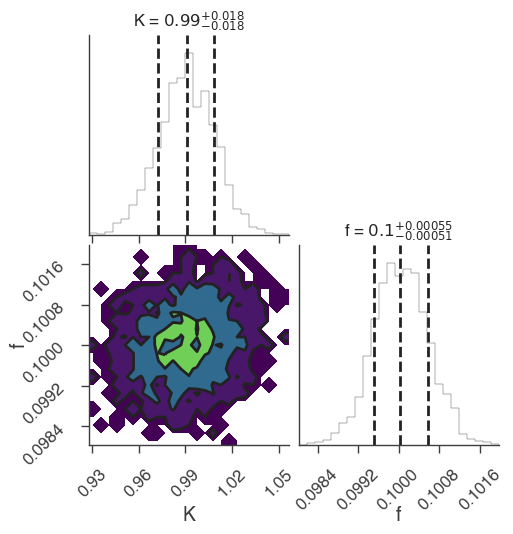

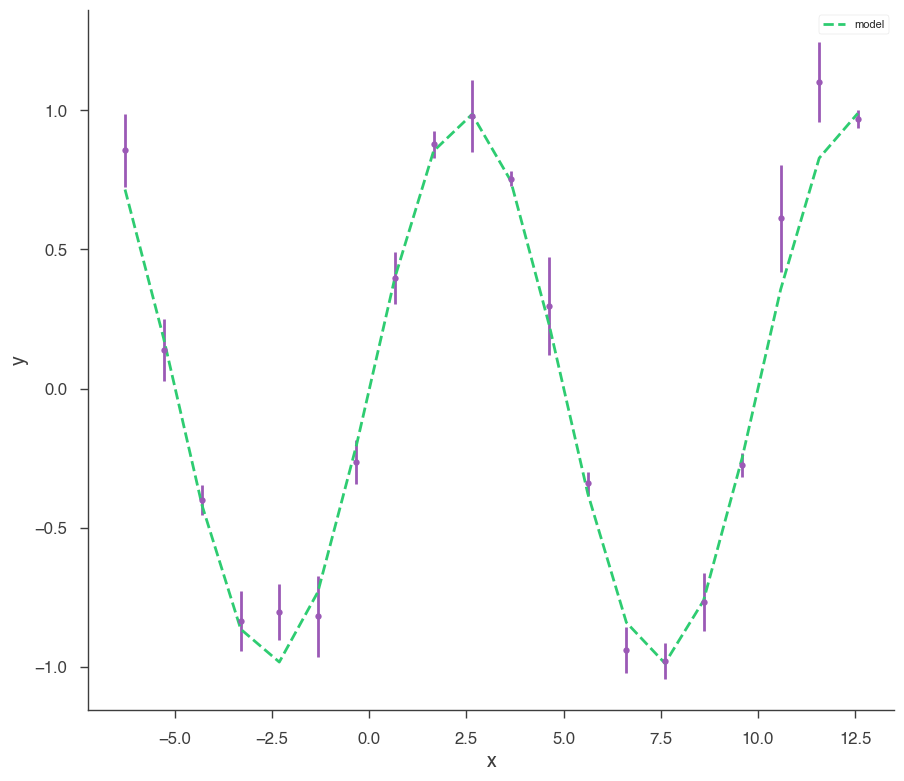

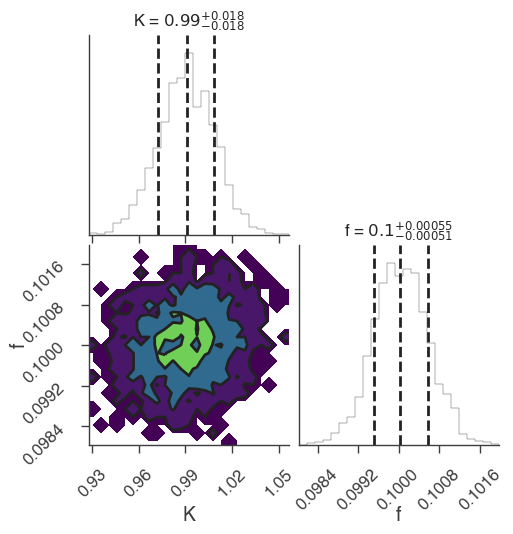

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

23:23:19 INFO      sampler set to dynesty_dynamic                                          ]8;id=485003;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=204097;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

88it [00:00, 879.87it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 92 | eff(%): 14.865 | loglstar:   -inf < -4007.534 <    inf | logz: -4014.606 +/-  0.118 | dlogz: 3967.704 >  0.010]

267it [00:00, 1414.52it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 343 | eff(%): 31.673 | loglstar:   -inf < -2662.405 <    inf | logz: -2669.846 +/-  0.122 | dlogz: 2664.776 >  0.010]

474it [00:00, 1712.38it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 755 | eff(%): 37.769 | loglstar:   -inf < -2085.793 <    inf | logz: -2093.010 +/-  0.112 | dlogz: 2081.320 >  0.010]

646it [00:00, 1551.91it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1290 | eff(%): 36.089 | loglstar:   -inf < -1749.221 <    inf | logz: -1756.681 +/-  0.117 | dlogz: 1744.874 >  0.010]

804it [00:00, 1238.32it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 2008 | eff(%): 32.057 | loglstar:   -inf < -1492.953 <    inf | logz: -1499.834 +/-  0.116 | dlogz: 1490.963 >  0.010]

937it [00:00, 1199.83it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 2663 | eff(%): 29.624 | loglstar:   -inf < -1333.926 <    inf | logz: -1341.949 +/-  0.119 | dlogz: 1333.326 >  0.010]

1063it [00:00, 1003.51it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 3554 | eff(%): 26.221 | loglstar:   -inf < -1255.914 <    inf | logz: -1264.048 +/-  0.115 | dlogz: 1254.852 >  0.010]

1171it [00:01, 869.86it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 4551 | eff(%): 23.184 | loglstar:   -inf < -1156.156 <    inf | logz: -1164.979 +/-  0.126 | dlogz: 1156.331 >  0.010] 

1265it [00:01, 760.43it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 5496 | eff(%): 21.097 | loglstar:   -inf < -1062.596 <    inf | logz: -1070.414 +/-  0.121 | dlogz: 1060.613 >  0.010]

1347it [00:01, 662.72it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 6388 | eff(%): 19.556 | loglstar:   -inf < -837.799 <    inf | logz: -846.335 +/-  0.130 | dlogz: 836.987 >  0.010]    

1418it [00:01, 558.01it/s, batch: 0 | bound: 0 | nc: 60 | ncall: 7623 | eff(%): 17.457 | loglstar:   -inf < -667.019 <    inf | logz: -676.634 +/-  0.136 | dlogz: 668.725 >  0.010]

1478it [00:01, 436.04it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 8796 | eff(%): 15.899 | loglstar:   -inf < -568.123 <    inf | logz: -577.313 +/-  0.131 | dlogz: 567.861 >  0.010]

1528it [00:02, 382.07it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 9774 | eff(%): 14.872 | loglstar:   -inf < -496.094 <    inf | logz: -505.290 +/-  0.133 | dlogz: 495.770 >  0.010] 

1570it [00:02, 343.41it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 10584 | eff(%): 14.165 | loglstar:   -inf < -438.334 <    inf | logz: -447.191 +/-  0.129 | dlogz: 437.051 >  0.010]

1607it [00:02, 317.81it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 11462 | eff(%): 13.434 | loglstar:   -inf < -396.455 <    inf | logz: -405.809 +/-  0.130 | dlogz: 395.720 >  0.010]

1640it [00:02, 293.04it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 12490 | eff(%): 12.625 | loglstar:   -inf < -378.069 <    inf | logz: -387.346 +/-  0.128 | dlogz: 377.156 >  0.010]

1672it [00:02, 295.26it/s, batch: 0 | bound: 0 | nc: 46 | ncall: 13152 | eff(%): 12.247 | loglstar:   -inf < -354.229 <    inf | logz: -363.090 +/-  0.126 | dlogz: 352.660 >  0.010]

1703it [00:02, 294.18it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 13834 | eff(%): 11.881 | loglstar:   -inf < -331.778 <    inf | logz: -340.991 +/-  0.129 | dlogz: 330.709 >  0.010]

1733it [00:02, 270.74it/s, batch: 0 | bound: 0 | nc: 69 | ncall: 14741 | eff(%): 11.371 | loglstar:   -inf < -312.097 <    inf | logz: -320.676 +/-  0.125 | dlogz: 309.967 >  0.010]

1761it [00:02, 265.69it/s, batch: 0 | bound: 0 | nc: 60 | ncall: 15320 | eff(%): 11.131 | loglstar:   -inf < -297.736 <    inf | logz: -307.093 +/-  0.129 | dlogz: 296.703 >  0.010]

1788it [00:03, 222.32it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 16043 | eff(%): 10.808 | loglstar:   -inf < -283.204 <    inf | logz: -292.501 +/-  0.131 | dlogz: 282.171 >  0.010]

1812it [00:03, 176.29it/s, batch: 0 | bound: 0 | nc: 84 | ncall: 16815 | eff(%): 10.465 | loglstar:   -inf < -269.782 <    inf | logz: -278.803 +/-  0.130 | dlogz: 268.170 >  0.010]

1832it [00:03, 156.12it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 17398 | eff(%): 10.236 | loglstar:   -inf < -259.464 <    inf | logz: -268.523 +/-  0.128 | dlogz: 257.744 >  0.010]

1849it [00:03, 99.61it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 17927 | eff(%): 10.034 | loglstar:   -inf < -253.697 <    inf | logz: -262.449 +/-  0.125 | dlogz: 251.786 >  0.010]  

1863it [00:04, 53.91it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18060 | eff(%): 10.038 | loglstar:   -inf < -248.107 <    inf | logz: -256.938 +/-  0.128 | dlogz: 246.342 >  0.010]

1873it [00:04, 55.70it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18073 | eff(%): 10.085 | loglstar:   -inf < -243.650 <    inf | logz: -252.767 +/-  0.129 | dlogz: 242.298 >  0.010]

1985it [00:04, 182.55it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18244 | eff(%): 10.590 | loglstar:   -inf < -195.193 <    inf | logz: -204.726 +/-  0.132 | dlogz: 194.095 >  0.010]

2087it [00:05, 303.96it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18422 | eff(%): 11.029 | loglstar:   -inf < -161.492 <    inf | logz: -170.605 +/-  0.129 | dlogz: 159.477 >  0.010]

2146it [00:05, 338.02it/s, batch: 0 | bound: 1 | nc: 5 | ncall: 18541 | eff(%): 11.270 | loglstar:   -inf < -144.762 <    inf | logz: -153.624 +/-  0.126 | dlogz: 142.282 >  0.010]

2238it [00:05, 448.65it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18766 | eff(%): 11.616 | loglstar:   -inf < -124.660 <    inf | logz: -133.729 +/-  0.128 | dlogz: 122.191 >  0.010]

2304it [00:05, 269.05it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18866 | eff(%): 11.897 | loglstar:   -inf < -109.593 <    inf | logz: -118.638 +/-  0.128 | dlogz: 106.947 >  0.010]

2500it [00:05, 510.04it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19167 | eff(%): 12.712 | loglstar:   -inf < -72.734 <    inf | logz: -82.302 +/-  0.131 | dlogz: 70.242 >  0.010]   

2663it [00:05, 697.43it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 19539 | eff(%): 13.289 | loglstar:   -inf < -53.953 <    inf | logz: -63.142 +/-  0.128 | dlogz: 50.660 >  0.010]

2777it [00:06, 540.36it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19676 | eff(%): 13.764 | loglstar:   -inf < -44.050 <    inf | logz: -53.369 +/-  0.127 | dlogz: 40.649 >  0.010]

2905it [00:06, 659.06it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19885 | eff(%): 14.251 | loglstar:   -inf < -34.502 <    inf | logz: -43.826 +/-  0.129 | dlogz: 30.829 >  0.010]

3033it [00:06, 774.22it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 20171 | eff(%): 14.673 | loglstar:   -inf < -28.319 <    inf | logz: -37.490 +/-  0.129 | dlogz: 24.215 >  0.010]

3143it [00:06, 528.10it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20358 | eff(%): 15.069 | loglstar:   -inf < -23.920 <    inf | logz: -33.005 +/-  0.128 | dlogz: 19.498 >  0.010]

3362it [00:07, 774.37it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20690 | eff(%): 15.866 | loglstar:   -inf < -17.957 <    inf | logz: -26.850 +/-  0.127 | dlogz: 12.890 >  0.010]

3520it [00:07, 753.29it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21054 | eff(%): 16.331 | loglstar:   -inf < -14.823 <    inf | logz: -23.901 +/-  0.128 | dlogz:  9.628 >  0.010]

3771it [00:07, 1059.79it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 21376 | eff(%): 17.238 | loglstar:   -inf < -11.739 <    inf | logz: -20.792 +/-  0.127 | dlogz:  6.031 >  0.010]

3935it [00:07, 1174.37it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 21719 | eff(%): 17.710 | loglstar:   -inf < -10.621 <    inf | logz: -19.547 +/-  0.127 | dlogz:  4.465 >  0.010]

4088it [00:07, 989.22it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21962 | eff(%): 18.200 | loglstar:   -inf < -9.701 <    inf | logz: -18.733 +/-  0.127 | dlogz:  3.368 >  0.010]  

4240it [00:07, 1095.03it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22256 | eff(%): 18.632 | loglstar:   -inf < -9.097 <    inf | logz: -18.107 +/-  0.127 | dlogz:  2.488 >  0.010]

4375it [00:08, 590.90it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22560 | eff(%): 18.972 | loglstar:   -inf < -8.681 <    inf | logz: -17.699 +/-  0.127 | dlogz:  1.888 >  0.010] 

4596it [00:08, 803.11it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22857 | eff(%): 19.677 | loglstar:   -inf < -8.187 <    inf | logz: -17.222 +/-  0.127 | dlogz:  1.176 >  0.010]

4727it [00:08, 628.29it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 23129 | eff(%): 20.005 | loglstar:   -inf < -7.949 <    inf | logz: -17.019 +/-  0.127 | dlogz:  0.878 >  0.010]

4830it [00:08, 570.36it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23341 | eff(%): 20.259 | loglstar:   -inf < -7.810 <    inf | logz: -16.890 +/-  0.127 | dlogz:  0.697 >  0.010]

4967it [00:09, 684.82it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23539 | eff(%): 20.662 | loglstar:   -inf < -7.669 <    inf | logz: -16.755 +/-  0.127 | dlogz:  0.512 >  0.010]

5067it [00:09, 663.93it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23703 | eff(%): 20.935 | loglstar:   -inf < -7.602 <    inf | logz: -16.677 +/-  0.127 | dlogz:  0.410 >  0.010]

5198it [00:09, 779.46it/s, batch: 0 | bound: 8 | nc: 5 | ncall: 23998 | eff(%): 21.218 | loglstar:   -inf < -7.498 <    inf | logz: -16.595 +/-  0.127 | dlogz:  0.307 >  0.010]

5299it [00:09, 672.20it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24135 | eff(%): 21.510 | loglstar:   -inf < -7.445 <    inf | logz: -16.545 +/-  0.127 | dlogz:  0.246 >  0.010]

5469it [00:09, 869.38it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 24396 | eff(%): 21.967 | loglstar:   -inf < -7.383 <    inf | logz: -16.480 +/-  0.127 | dlogz:  0.171 >  0.010]

5609it [00:09, 983.17it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24680 | eff(%): 22.276 | loglstar:   -inf < -7.350 <    inf | logz: -16.441 +/-  0.127 | dlogz:  0.127 >  0.010]

5729it [00:10, 724.65it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24893 | eff(%): 22.561 | loglstar:   -inf < -7.328 <    inf | logz: -16.415 +/-  0.127 | dlogz:  0.099 >  0.010]

5826it [00:10, 736.60it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25018 | eff(%): 22.831 | loglstar:   -inf < -7.314 <    inf | logz: -16.399 +/-  0.127 | dlogz:  0.081 >  0.010]

6007it [00:10, 957.46it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25330 | eff(%): 23.256 | loglstar:   -inf < -7.291 <    inf | logz: -16.375 +/-  0.127 | dlogz:  0.056 >  0.010]

6125it [00:10, 693.79it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25570 | eff(%): 23.494 | loglstar:   -inf < -7.279 <    inf | logz: -16.364 +/-  0.127 | dlogz:  0.044 >  0.010]

6256it [00:10, 805.97it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25738 | eff(%): 23.843 | loglstar:   -inf < -7.268 <    inf | logz: -16.354 +/-  0.127 | dlogz:  0.034 >  0.010]

6423it [00:10, 984.36it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 26006 | eff(%): 24.232 | loglstar:   -inf < -7.259 <    inf | logz: -16.345 +/-  0.127 | dlogz:  0.024 >  0.010]

6553it [00:10, 1055.91it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 26278 | eff(%): 24.472 | loglstar:   -inf < -7.254 <    inf | logz: -16.339 +/-  0.127 | dlogz:  0.018 >  0.010]

6679it [00:11, 860.31it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 26459 | eff(%): 24.775 | loglstar:   -inf < -7.249 <    inf | logz: -16.335 +/-  0.127 | dlogz:  0.014 >  0.010] 

6926it [00:11, 1205.38it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26823 | eff(%): 25.415 | loglstar:   -inf < -7.244 <    inf | logz: -16.330 +/-  0.127 | dlogz:  0.009 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7355it [00:12, 696.25it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27252 | eff(%): 26.989 | loglstar: -9.232 < -7.370 < -7.700 | logz: -16.321 +/-  0.131 | stop:  1.396]            

7529it [00:12, 808.69it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 27482 | eff(%): 26.878 | loglstar: -9.232 < -8.638 < -7.700 | logz: -16.321 +/-  0.131 | stop:  1.396]

7688it [00:12, 905.51it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27740 | eff(%): 27.195 | loglstar: -9.232 < -8.282 < -7.700 | logz: -16.321 +/-  0.131 | stop:  1.396]

7828it [00:12, 781.50it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28032 | eff(%): 27.407 | loglstar: -9.232 < -8.025 < -7.700 | logz: -16.321 +/-  0.131 | stop:  1.396]

8013it [00:12, 944.26it/s, batch: 1 | bound: 3 | nc: 4 | ncall: 28292 | eff(%): 27.802 | loglstar: -9.232 < -7.770 < -7.700 | logz: -16.321 +/-  0.131 | stop:  1.396]

8148it [00:12, 959.34it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28484 | eff(%): 28.159 | loglstar: -9.232 < -7.623 < -7.700 | logz: -16.321 +/-  0.131 | stop:  1.396]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8575it [00:13, 562.34it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28936 | eff(%): 29.634 | loglstar: -9.683 < -9.011 < -9.229 | logz: -16.309 +/-  0.106 | stop:  1.041]

8938it [00:13, 834.67it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29330 | eff(%): 30.210 | loglstar: -9.683 < -8.202 < -9.229 | logz: -16.309 +/-  0.106 | stop:  1.041]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9180it [00:14, 646.99it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29586 | eff(%): 31.028 | loglstar: -9.683 < -7.237 < -9.229 | logz: -16.309 +/-  0.106 | stop:  0.909]

9180it [00:14, 632.81it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29586 | eff(%): 31.028 | loglstar: -9.683 < -7.237 < -9.229 | logz: -16.309 +/-  0.106 | stop:  0.909]

23:23:34 INFO      fit restored to maximum of posterior                                         ]8;id=660600;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=985283;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=745230;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=589156;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.90 -0.19 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 -0.006 +0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.226211
total,-7.226211


Values of statistical measures:

,statistical measures
AIC,19.158304
BIC,20.443887
DIC,18.479790
PDIC,2.013406
log(Z),-7.080860


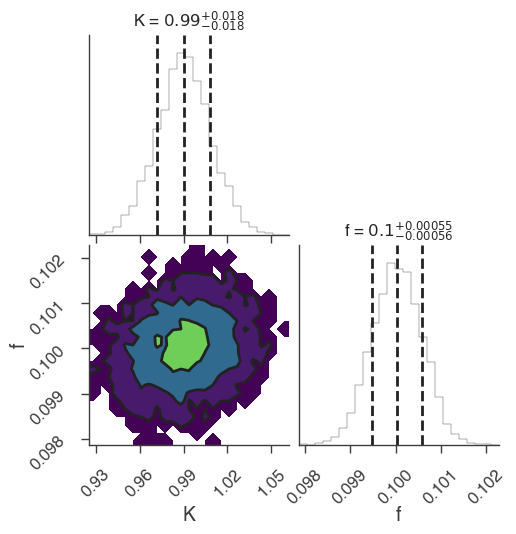

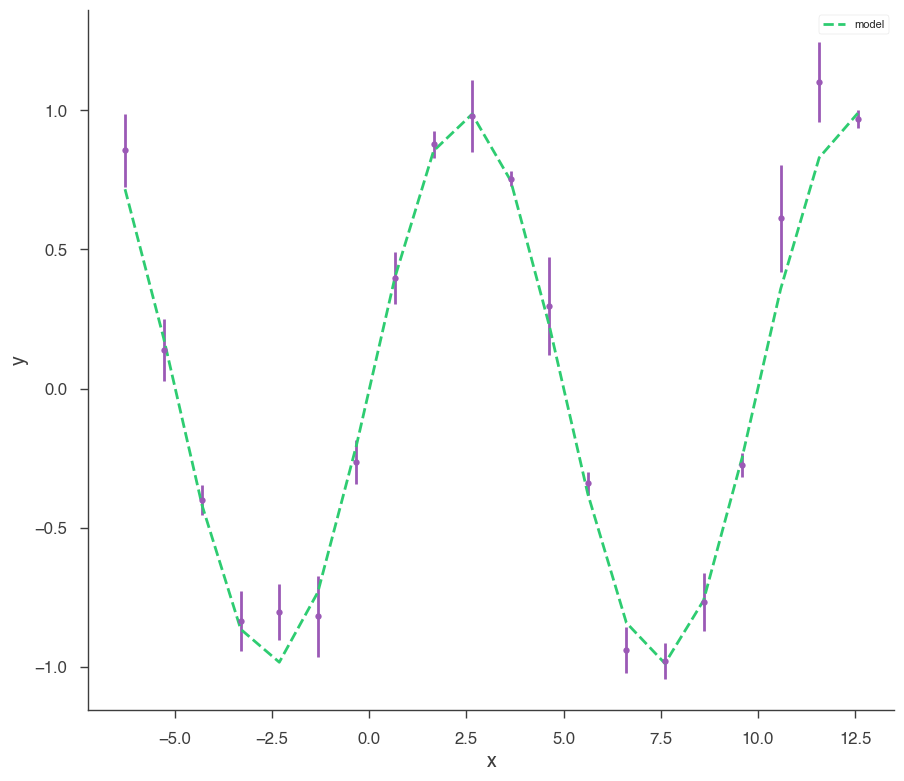

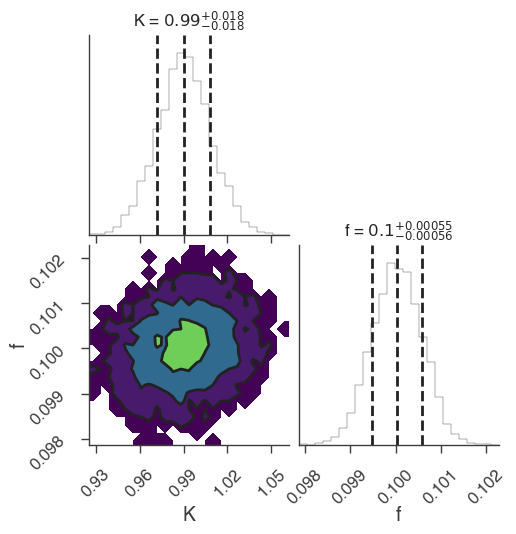

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

23:23:35 INFO      sampler set to zeus                                                     ]8;id=867045;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=250382;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:14, 42.81it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:13, 43.98it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:12, 48.05it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:12, 47.81it/s]

Sampling progress :   4%|▍         | 26/625 [00:00<00:12, 47.44it/s]

Sampling progress :   5%|▌         | 33/625 [00:00<00:10, 53.99it/s]

Sampling progress :   7%|▋         | 42/625 [00:00<00:09, 63.81it/s]

Sampling progress :   8%|▊         | 49/625 [00:00<00:08, 65.12it/s]

Sampling progress :   9%|▉         | 56/625 [00:01<00:09, 59.02it/s]

Sampling progress :  10%|█         | 63/625 [00:01<00:09, 59.85it/s]

Sampling progress :  11%|█         | 70/625 [00:01<00:08, 62.30it/s]

Sampling progress :  12%|█▏        | 77/625 [00:01<00:08, 61.33it/s]

Sampling progress :  13%|█▎        | 84/625 [00:01<00:08, 61.91it/s]

Sampling progress :  15%|█▍        | 91/625 [00:01<00:08, 61.18it/s]

Sampling progress :  16%|█▌        | 98/625 [00:01<00:09, 57.11it/s]

Sampling progress :  17%|█▋        | 104/625 [00:01<00:09, 56.05it/s]

Sampling progress :  18%|█▊        | 112/625 [00:01<00:08, 60.24it/s]

Sampling progress :  19%|█▉        | 119/625 [00:02<00:08, 60.50it/s]

Sampling progress :  20%|██        | 126/625 [00:02<00:07, 62.65it/s]

Sampling progress :  21%|██▏       | 133/625 [00:02<00:08, 57.58it/s]

Sampling progress :  22%|██▏       | 139/625 [00:02<00:08, 56.90it/s]

Sampling progress :  23%|██▎       | 145/625 [00:02<00:08, 57.36it/s]

Sampling progress :  24%|██▍       | 152/625 [00:02<00:07, 59.50it/s]

Sampling progress :  26%|██▌       | 160/625 [00:02<00:07, 63.22it/s]

Sampling progress :  27%|██▋       | 167/625 [00:02<00:07, 64.39it/s]

Sampling progress :  28%|██▊       | 175/625 [00:02<00:06, 67.00it/s]

Sampling progress :  29%|██▉       | 182/625 [00:03<00:07, 61.45it/s]

Sampling progress :  30%|███       | 189/625 [00:03<00:07, 58.43it/s]

Sampling progress :  31%|███       | 195/625 [00:03<00:07, 57.05it/s]

Sampling progress :  32%|███▏      | 201/625 [00:03<00:07, 55.24it/s]

Sampling progress :  33%|███▎      | 207/625 [00:03<00:08, 51.07it/s]

Sampling progress :  34%|███▍      | 213/625 [00:03<00:07, 52.66it/s]

Sampling progress :  35%|███▌      | 220/625 [00:03<00:07, 56.53it/s]

Sampling progress :  36%|███▋      | 227/625 [00:03<00:06, 59.67it/s]

Sampling progress :  37%|███▋      | 234/625 [00:04<00:06, 61.77it/s]

Sampling progress :  39%|███▊      | 241/625 [00:04<00:07, 51.64it/s]

Sampling progress :  40%|███▉      | 247/625 [00:04<00:08, 45.98it/s]

Sampling progress :  40%|████      | 252/625 [00:04<00:08, 42.20it/s]

Sampling progress :  41%|████      | 257/625 [00:04<00:08, 41.96it/s]

Sampling progress :  42%|████▏     | 263/625 [00:04<00:08, 44.50it/s]

Sampling progress :  43%|████▎     | 268/625 [00:04<00:07, 44.81it/s]

Sampling progress :  44%|████▎     | 273/625 [00:04<00:07, 44.28it/s]

Sampling progress :  44%|████▍     | 278/625 [00:05<00:07, 43.98it/s]

Sampling progress :  45%|████▌     | 283/625 [00:05<00:07, 45.38it/s]

Sampling progress :  46%|████▋     | 290/625 [00:05<00:06, 50.43it/s]

Sampling progress :  47%|████▋     | 296/625 [00:05<00:06, 51.51it/s]

Sampling progress :  48%|████▊     | 302/625 [00:05<00:06, 52.53it/s]

Sampling progress :  49%|████▉     | 308/625 [00:05<00:06, 52.09it/s]

Sampling progress :  50%|█████     | 314/625 [00:05<00:05, 52.48it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:05<00:05, 57.24it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:05<00:05, 53.10it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:06<00:05, 52.55it/s]

Sampling progress :  54%|█████▍    | 339/625 [00:06<00:05, 48.02it/s]

Sampling progress :  55%|█████▌    | 345/625 [00:06<00:05, 50.93it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:06<00:05, 54.35it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:06<00:05, 51.77it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:06<00:04, 53.87it/s]

Sampling progress :  59%|█████▉    | 371/625 [00:06<00:04, 55.87it/s]

Sampling progress :  60%|██████    | 377/625 [00:06<00:04, 52.97it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:07<00:04, 52.19it/s]

Sampling progress :  62%|██████▏   | 389/625 [00:07<00:05, 42.25it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:07<00:05, 45.16it/s]

Sampling progress :  64%|██████▍   | 401/625 [00:07<00:04, 48.47it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:07<00:04, 49.61it/s]

Sampling progress :  66%|██████▋   | 415/625 [00:07<00:03, 54.13it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:07<00:03, 54.71it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:07<00:03, 57.12it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:08<00:03, 60.22it/s]

Sampling progress :  71%|███████   | 442/625 [00:08<00:04, 45.03it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:08<00:03, 50.19it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:08<00:03, 52.66it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:08<00:03, 49.78it/s]

Sampling progress :  75%|███████▍  | 468/625 [00:08<00:03, 51.84it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:08<00:02, 51.04it/s]

Sampling progress :  77%|███████▋  | 481/625 [00:08<00:02, 55.79it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:09<00:02, 55.31it/s]

Sampling progress :  79%|███████▉  | 493/625 [00:09<00:02, 55.27it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:09<00:02, 56.35it/s]

Sampling progress :  81%|████████  | 505/625 [00:09<00:02, 41.52it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:09<00:02, 41.63it/s]

Sampling progress :  83%|████████▎ | 517/625 [00:09<00:02, 46.89it/s]

Sampling progress :  84%|████████▎ | 523/625 [00:09<00:02, 47.37it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:09<00:01, 48.81it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:10<00:01, 53.06it/s]

Sampling progress :  87%|████████▋ | 544/625 [00:10<00:01, 52.05it/s]

Sampling progress :  88%|████████▊ | 550/625 [00:10<00:01, 50.15it/s]

Sampling progress :  89%|████████▉ | 556/625 [00:10<00:01, 48.69it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:10<00:01, 47.23it/s]

Sampling progress :  91%|█████████ | 568/625 [00:10<00:01, 49.24it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:10<00:01, 47.63it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:11<00:01, 43.34it/s]

Sampling progress :  93%|█████████▎| 583/625 [00:11<00:01, 41.26it/s]

Sampling progress :  94%|█████████▍| 588/625 [00:11<00:00, 40.28it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:11<00:00, 40.01it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:11<00:00, 44.65it/s]

Sampling progress :  97%|█████████▋| 604/625 [00:11<00:00, 39.90it/s]

Sampling progress :  97%|█████████▋| 609/625 [00:11<00:00, 41.06it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:11<00:00, 39.13it/s]

Sampling progress :  99%|█████████▉| 619/625 [00:12<00:00, 37.71it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:12<00:00, 36.04it/s]

Sampling progress : 100%|██████████| 625/625 [00:12<00:00, 50.95it/s]

23:23:48 INFO      fit restored to maximum of posterior                                         ]8;id=413754;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=760161;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=813660;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=313821;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 21


Scale Factor: 1.022713


Mean Integrated Autocorrelation Time: 3.12


Effective Sample Size: 4011.25


Number of Log Probability Evaluations: 67088


Effective Samples per Log Probability Evaluation: 0.059791


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.90 -0.17 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.226169
total,-7.226169


Values of statistical measures:

,statistical measures
AIC,19.158220
BIC,20.443803
DIC,18.301932
PDIC,1.924389


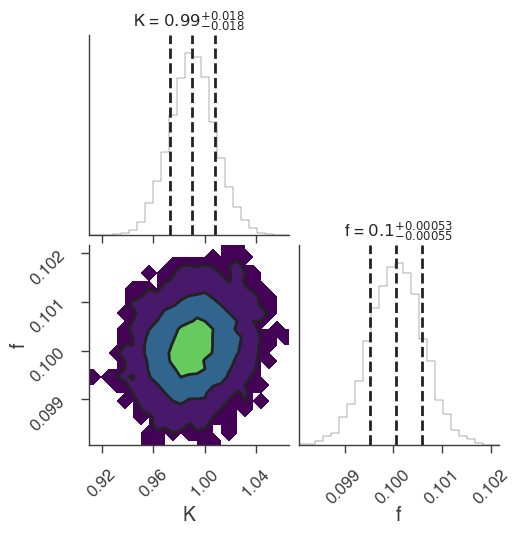

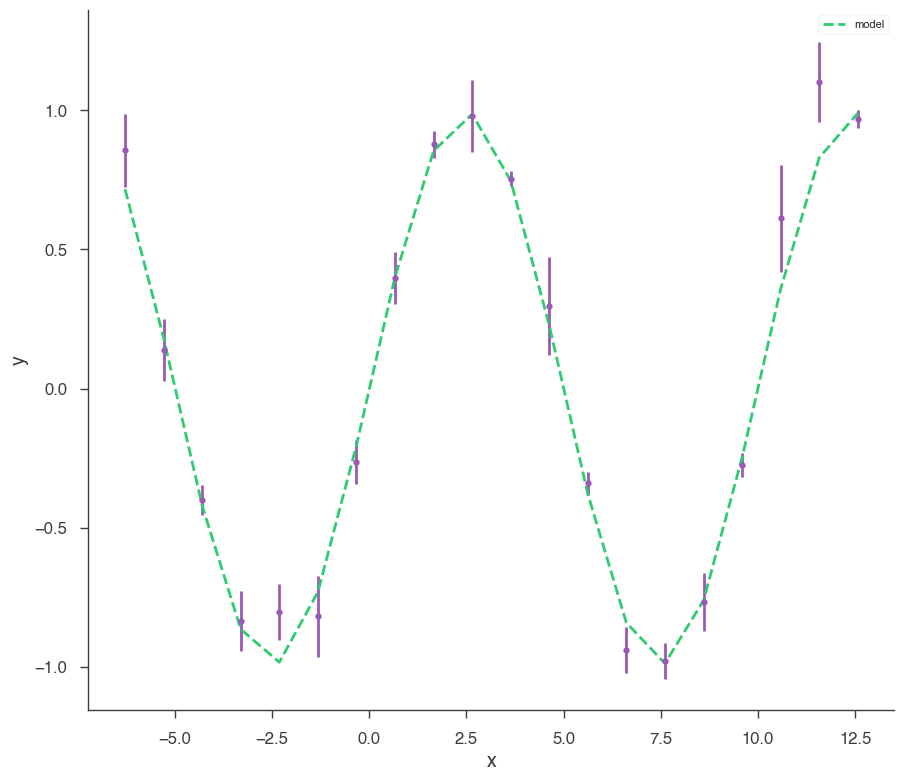

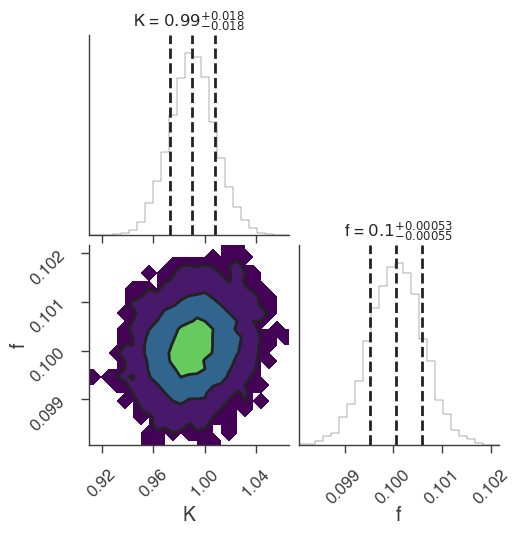

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

23:23:50 INFO      sampler set to ultranest                                                ]8;id=572575;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=854722;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7  


[ultranest] Likelihood function evaluations: 7674


[ultranest]   logZ = -16.07 +- 0.1019


[ultranest] Effective samples strategy satisfied (ESS = 975.1, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


23:24:01 INFO      fit restored to maximum of posterior                                         ]8;id=356285;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=989265;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=944664;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=646975;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 +/- 0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 -0.006 +0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.228538
total,-7.228538


Values of statistical measures:

,statistical measures
AIC,19.162958
BIC,20.448540
DIC,18.367390
PDIC,1.957350
log(Z),-6.989315


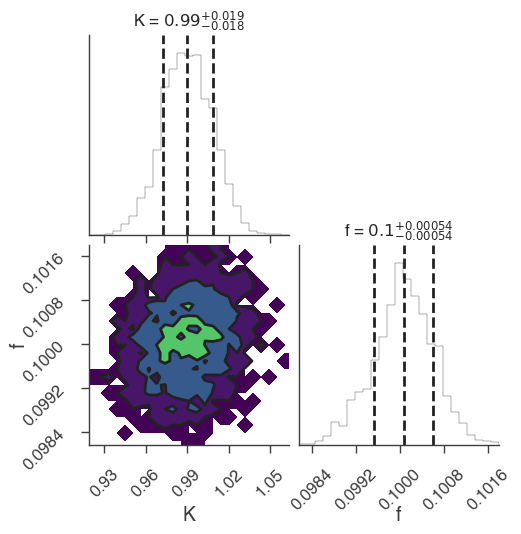

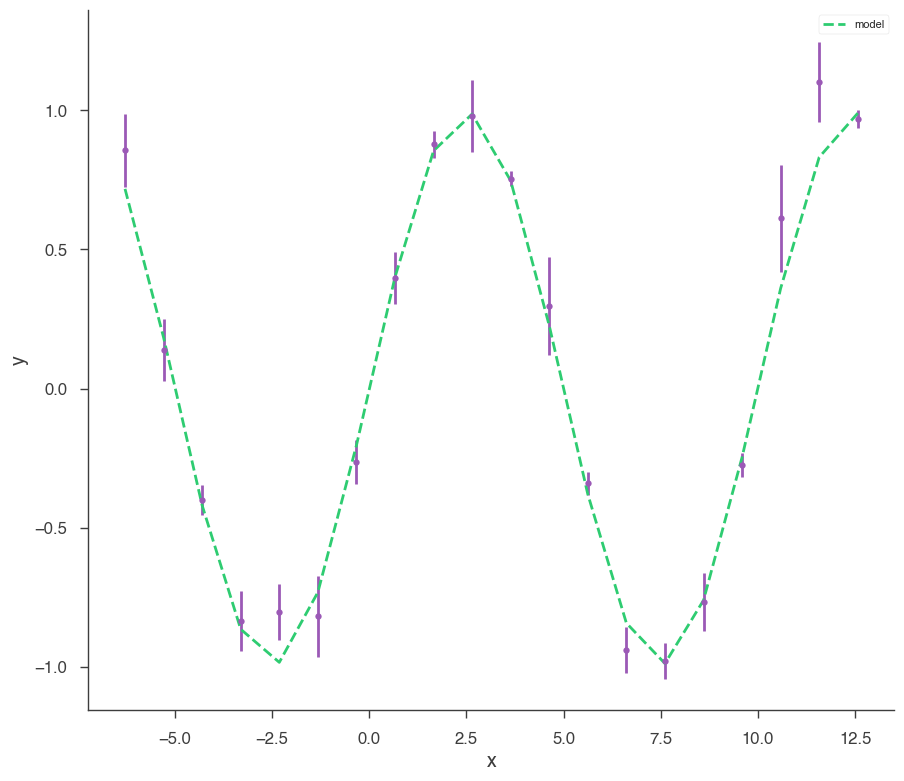

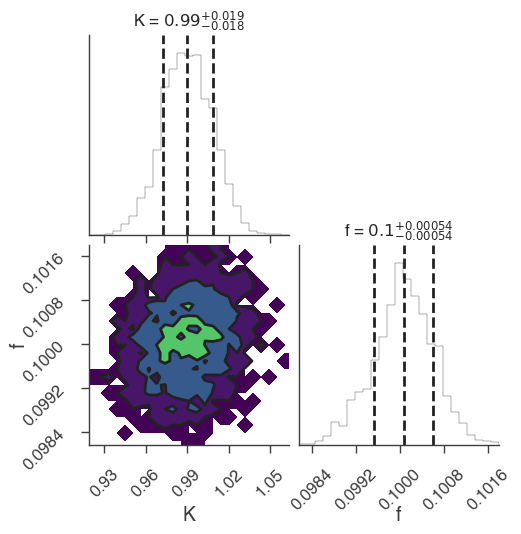

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()